In [1173]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from scipy.stats import boxcox

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.tools import add_constant
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import KFold, cross_val_score



# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [5]:
df = pd.read_csv('Emp_reimb.csv')
df.dtypes

Year                     int64
Type_of_yr              object
Emp_ID                   int64
Income                 float64
Other_Income           float64
Overtime               float64
Total_Income           float64
Health_Insurance       float64
Retirement             float64
Other_Benefits         float64
Total_Benefits         float64
Total_Reimbursement    float64
dtype: object

In [7]:
#The dataset comprises 9 numeric columns and 1 categorical (object) column. 
#Since 'Employee ID' serves only as a unique identifier and holds no predictive value, it will be excluded from the analysis. 
#Additionally, the 'Year' column has been converted to a categorical variable to better reflect 
#its role in grouping or segmentation rather than as a continuous feature.
df.info()
df=df.drop(columns='Emp_ID')
df['Year'] = df['Year'].astype('object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49794 entries, 0 to 49793
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 49794 non-null  int64  
 1   Type_of_yr           49794 non-null  object 
 2   Emp_ID               49794 non-null  int64  
 3   Income               49794 non-null  float64
 4   Other_Income         49794 non-null  float64
 5   Overtime             49794 non-null  float64
 6   Total_Income         49794 non-null  float64
 7   Health_Insurance     49794 non-null  float64
 8   Retirement           49794 non-null  float64
 9   Other_Benefits       49794 non-null  float64
 10  Total_Benefits       49794 non-null  float64
 11  Total_Reimbursement  49794 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 4.6+ MB


df.info(),df.isnull().sum()

In [9]:
df['Year'].value_counts()

Year
2015    14661
2018    14043
2017    13564
2016     7526
Name: count, dtype: int64

In [ ]:
## Handling the missing values

In [11]:
## Extract the Numberic coluumn and checking the NaN
df_numeric = df.select_dtypes(include =['int','float'])
## Colum and row wise Analysis
val = df.isnull().sum()
val
# df.isnull().sum(axis=1)

## There is no null values here


Year                   0
Type_of_yr             0
Income                 0
Other_Income           0
Overtime               0
Total_Income           0
Health_Insurance       0
Retirement             0
Other_Benefits         0
Total_Benefits         0
Total_Reimbursement    0
dtype: int64

## Finding the Outliers

In [13]:
columnname = df.columns

In [15]:
df.loc[:,('Income','Other_Income','Overtime','Health_Insurance','Retirement','Other_Benefits')].head(2)

,Income,Other_Income,Overtime,Health_Insurance,Retirement,Other_Benefits
0,92288.220000,267.450000,270.450000,12500.560000,20703.200000,7605.750000
1,1466.380000,0.000000,350.230000,442.030000,3.000000,141.590000


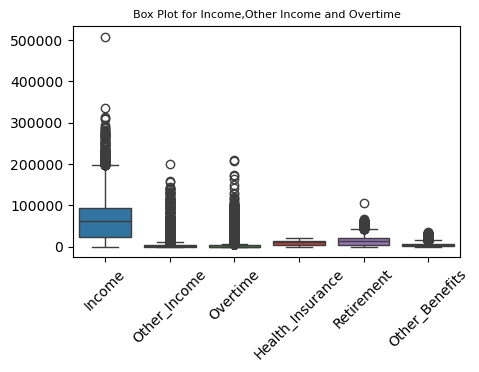

In [17]:
plt.figure(figsize=(5,3))
sns.boxplot(df.loc[:,('Income','Other_Income','Overtime','Health_Insurance','Retirement','Other_Benefits')])
plt.title("Box Plot for Income,Other Income and Overtime",fontsize=8)
plt.xticks(rotation=45)
plt.show()

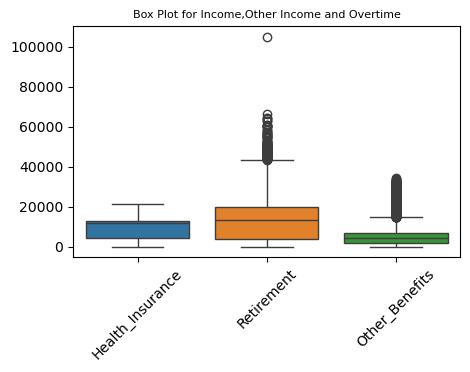

In [19]:
plt.figure(figsize=(5,3))
sns.boxplot(df.loc[:,('Health_Insurance','Retirement','Other_Benefits')])
plt.title("Box Plot for Income,Other Income and Overtime",fontsize=8)
plt.xticks(rotation=45)
plt.show()

In [21]:
q1_q3= df_numeric.quantile([0.25,0.75])
print(q1_q3)

               Income  Other_Income    Overtime  Total_Income  \
0.250000 23752.425000      0.000000    5.000000  25635.925000   
0.750000 93124.830000   4494.062500 2692.230000 103031.792500   

          Health_Insurance   Retirement  Other_Benefits  Total_Benefits  \
0.250000       4339.617500  3680.890000     1617.325000     9832.992500   
0.750000      12801.790000 19610.367500     6864.430000    38741.512500   

          Total_Reimbursement  
0.250000         36388.335000  
0.750000        141968.395000  


In [23]:
q1=q1_q3.loc[0.25] ## This is row 
q3=q1_q3.loc[0.75]
IQR = q3-q1
print(IQR)

Income                 69372.405000
Other_Income            4494.062500
Overtime                2687.230000
Total_Income           77395.867500
Health_Insurance        8462.172500
Retirement             15929.477500
Other_Benefits          5247.105000
Total_Benefits         28908.520000
Total_Reimbursement   105580.060000
dtype: float64


In [25]:
Lower_bound = q1-1.5 * IQR
print("=="*30)
print(f"Lower Bound values\n{Lower_bound}")
print("=="*30)
Upper_bound = q3+1.5 * IQR
print(f"Upper Bound values\n{Upper_bound}")

Lower Bound values
Income                 -80306.182500
Other_Income            -6741.093750
Overtime                -4025.845000
Total_Income           -90457.876250
Health_Insurance        -8353.641250
Retirement             -20213.326250
Other_Benefits          -6253.332500
Total_Benefits         -33529.787500
Total_Reimbursement   -121981.755000
dtype: float64
Upper Bound values
Income                197183.437500
Other_Income           11235.156250
Overtime                6723.075000
Total_Income          219125.593750
Health_Insurance       25495.048750
Retirement             43504.583750
Other_Benefits         14735.087500
Total_Benefits         82104.292500
Total_Reimbursement   300338.485000
dtype: float64


## Instead of removing the outliers, we can apply capping(clip method) to limit extrame values. However, its important
## to check the business stakeholder before making any decision about the outliers treatment as those might be holding meaningfull
## information

In [27]:
out=df_numeric[(df_numeric<Lower_bound) | (df_numeric>Upper_bound)] ### This will show the outliers values only
non_outlier=df[~out.any(axis=1)].copy() ## Here are deleting the highlighted one

In pandas, when I filter a DataFrame, the result might still be connected to the original dataset. If I try to modify it, I may unintentionally affect the original or get a warning. To avoid this, I use .copy() to create a completely independent version of the filtered data. This makes it safe to modify, transform, or engineer new features without touching the original dataset

In [29]:
non_outlier.head()

,Year,Type_of_yr,Income,Other_Income,Overtime,Total_Income,Health_Insurance,Retirement,Other_Benefits,Total_Benefits,Total_Reimbursement
0,2015,Financial,92288.220000,267.450000,270.450000,92826.120000,12500.560000,20703.200000,7605.750000,40809.510000,133635.630000
1,2015,Calendar,1466.380000,0.000000,350.230000,1816.610000,442.030000,3.000000,141.590000,586.620000,2403.230000
3,2018,Financial,45659.880000,1625.370000,3.000000,47288.250000,0.000000,10084.200000,3936.630000,14020.830000,61309.080000
4,2017,Financial,41832.000000,0.000000,6.000000,41838.000000,5908.520000,7621.600000,3254.500000,16784.620000,58622.620000
5,2017,Calendar,74132.000000,1443.420000,4.000000,75579.420000,12888.340000,14855.230000,6233.850000,33977.420000,109556.840000


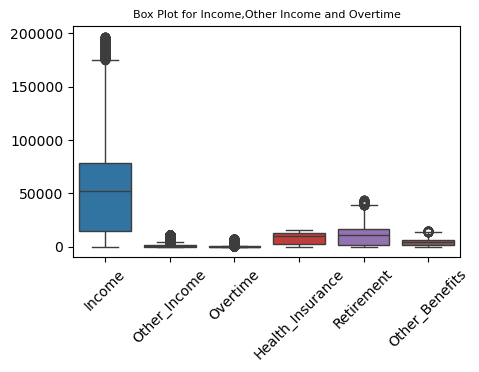

In [30]:
plt.figure(figsize=(5,3))
sns.boxplot(non_outlier.loc[:,('Income','Other_Income','Overtime','Health_Insurance','Retirement','Other_Benefits')])
plt.title("Box Plot for Income,Other Income and Overtime",fontsize=8)
plt.xticks(rotation=45)
plt.show()

## checking the total outliers in df

In [38]:
non_outlier.head()

,Year,Type_of_yr,Income,Other_Income,Overtime,Total_Income,Health_Insurance,Retirement,Other_Benefits,Total_Benefits,Total_Reimbursement
0,2015,Financial,92288.220000,267.450000,270.450000,92826.120000,12500.560000,20703.200000,7605.750000,40809.510000,133635.630000
1,2015,Calendar,1466.380000,0.000000,350.230000,1816.610000,442.030000,3.000000,141.590000,586.620000,2403.230000
3,2018,Financial,45659.880000,1625.370000,3.000000,47288.250000,0.000000,10084.200000,3936.630000,14020.830000,61309.080000
4,2017,Financial,41832.000000,0.000000,6.000000,41838.000000,5908.520000,7621.600000,3254.500000,16784.620000,58622.620000
5,2017,Calendar,74132.000000,1443.420000,4.000000,75579.420000,12888.340000,14855.230000,6233.850000,33977.420000,109556.840000


In [31]:
plot=non_outlier.loc[:,['Income','Other_Income','Overtime','Health_Insurance','Retirement','Other_Benefits','Total_Reimbursement']]

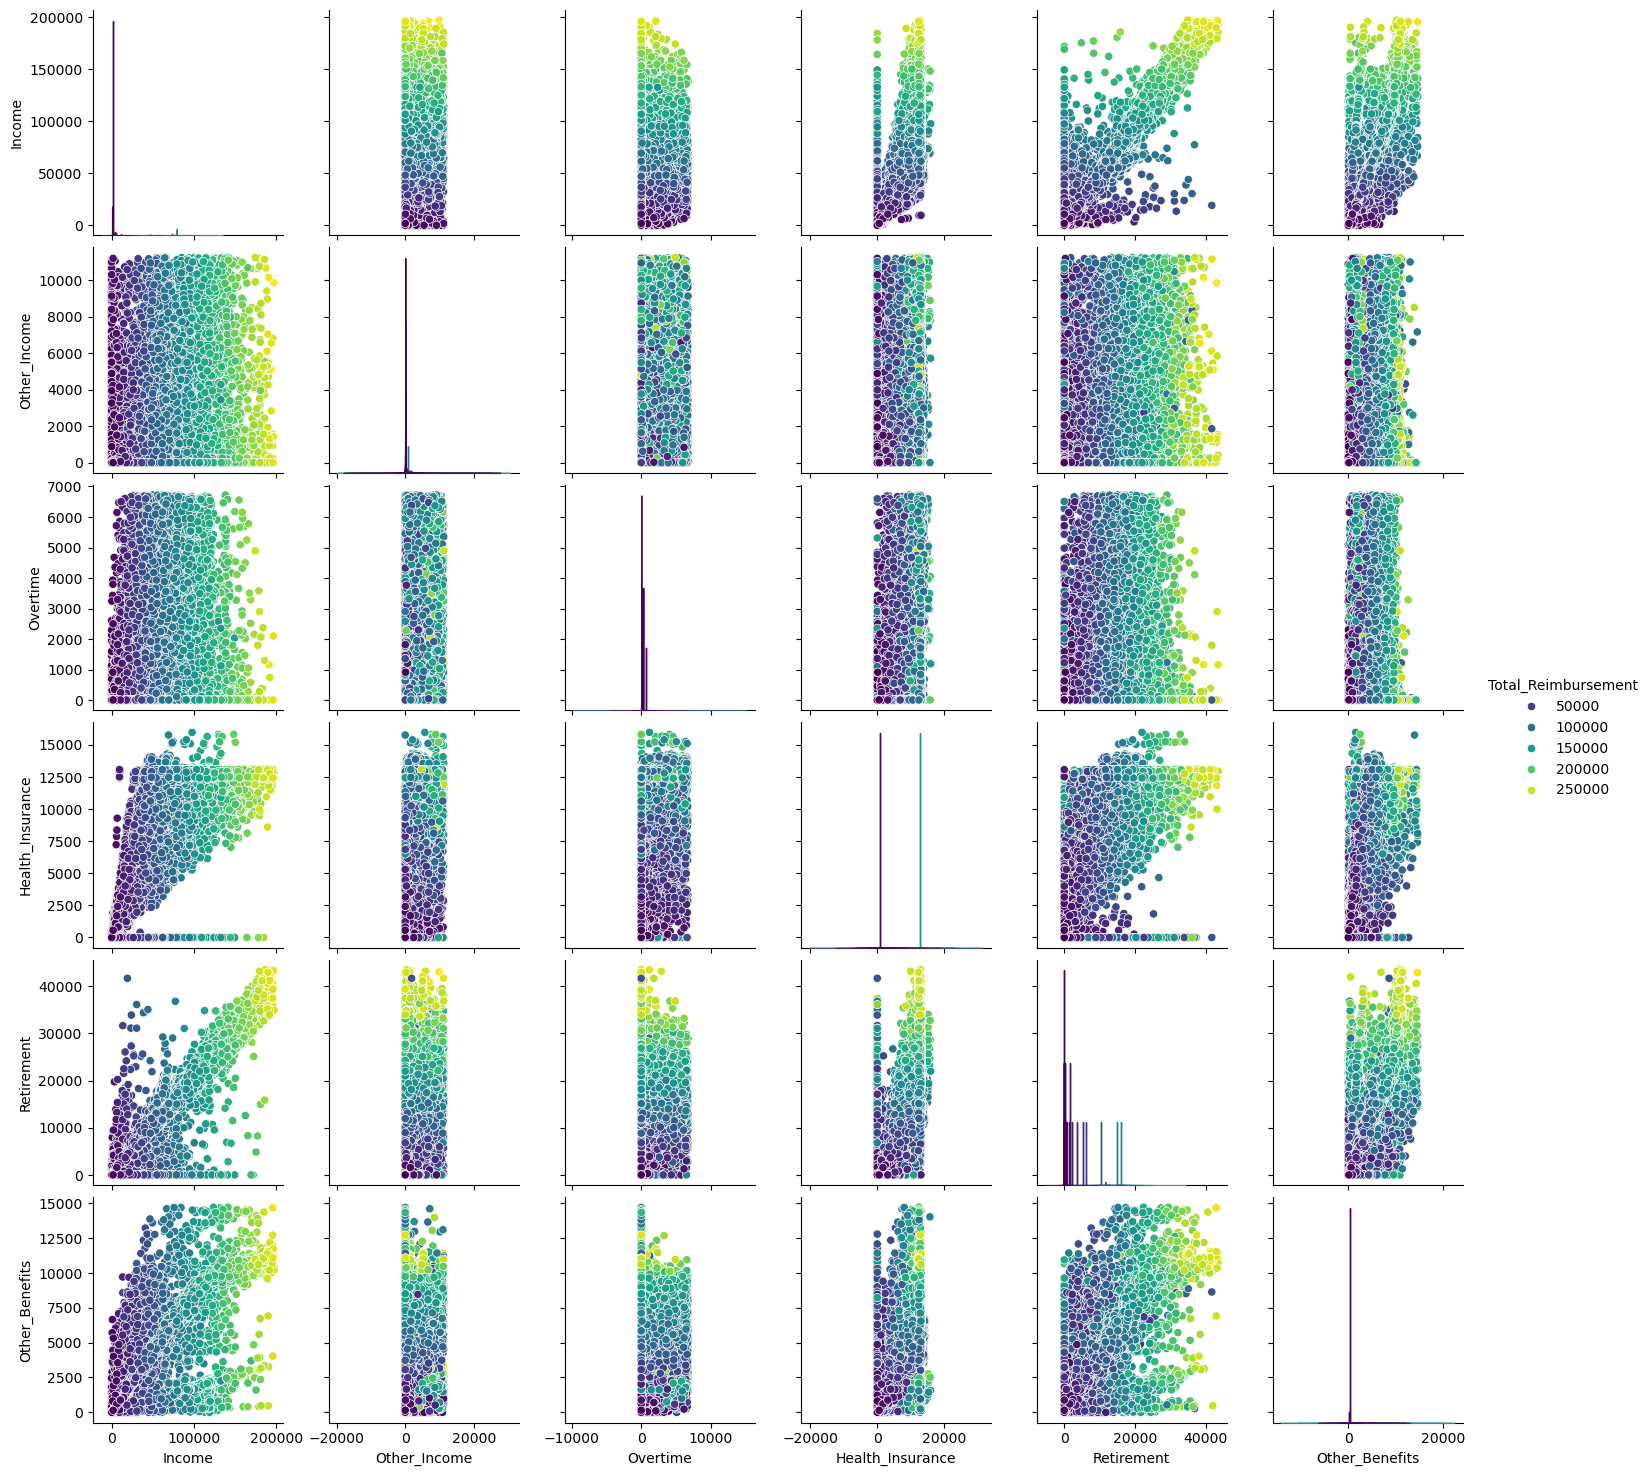

In [39]:
sns.pairplot(data=plot,hue='Total_Reimbursement',palette='viridis')
plt.show()


In [38]:
df['Total_Benefits'].skew()

-0.036805849146041326

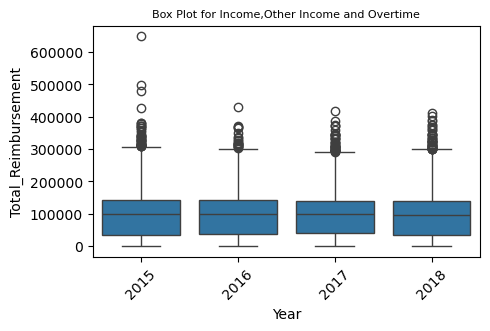

In [33]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df,x=df['Year'],y=df['Total_Reimbursement'])
plt.title("Box Plot for Income,Other Income and Overtime",fontsize=8)
plt.xticks(rotation=45)
plt.show()

In [35]:
df_numeric.corr()['Total_Reimbursement']

Income                0.972840
Other_Income          0.455592
Overtime              0.448943
Total_Income          0.994328
Health_Insurance      0.803285
Retirement            0.957395
Other_Benefits        0.672381
Total_Benefits        0.943781
Total_Reimbursement   1.000000
Name: Total_Reimbursement, dtype: float64

In [37]:
non_outlier.columns

Index(['Year', 'Type_of_yr', 'Income', 'Other_Income', 'Overtime',
       'Total_Income', 'Health_Insurance', 'Retirement', 'Other_Benefits',
       'Total_Benefits', 'Total_Reimbursement'],
      dtype='object')

I’m analyzing the correlation matrix of various income-related variables. My dependent variable is Total_Reimbursement, and I want to determine which variables should be selected as independent variables for building a regression model

In [39]:
non_outlier[['Income','Other_Income','Overtime','Health_Insurance','Retirement',
             'Other_Benefits','Total_Benefits','Total_Income','Total_Reimbursement']].corr()

,Income,Other_Income,Overtime,Health_Insurance,Retirement,Other_Benefits,Total_Benefits,Total_Income,Total_Reimbursement
Income,1.000000,0.283114,0.117961,0.804984,0.955034,0.877242,0.950583,0.997466,0.994353
Other_Income,0.283114,1.000000,0.286888,0.243310,0.293439,0.197801,0.276834,0.343687,0.328437
Overtime,0.117961,0.286888,1.000000,0.232102,0.159402,0.074363,0.175322,0.164472,0.169155
Health_Insurance,0.804984,0.243310,0.232102,1.000000,0.815871,0.763460,0.912892,0.808311,0.845657
Retirement,0.955034,0.293439,0.159402,0.815871,1.000000,0.851029,0.973704,0.955469,0.970144
Other_Benefits,0.877242,0.197801,0.074363,0.763460,0.851029,1.000000,0.904075,0.871155,0.889091
Total_Benefits,0.950583,0.276834,0.175322,0.912892,0.973704,0.904075,1.000000,0.950682,0.974001
Total_Income,0.997466,0.343687,0.164472,0.808311,0.955469,0.871155,0.950682,1.000000,0.996232
Total_Reimbursement,0.994353,0.328437,0.169155,0.845657,0.970144,0.889091,0.974001,0.996232,1.000000


If I use Total_Reimbursement is derived from the income, Overtime,Retirement, then using these variable as predictors will cause the data # leakage.I would like to keep the Health insurance as independent variable and Total_Reimbursement as Dependent. Health insurance increase , 
total_reimbursement also tends to increase.I am doing univarint analysis, this may not capture the full complexity of the influences total_reimbursement.

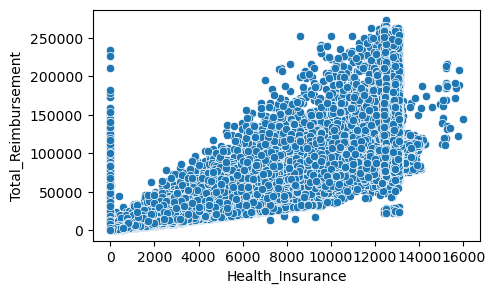

In [41]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=non_outlier['Health_Insurance'],y=non_outlier['Total_Reimbursement'])
plt.show()

In [ ]:
## checking the skewness of the independent and Dependent variable


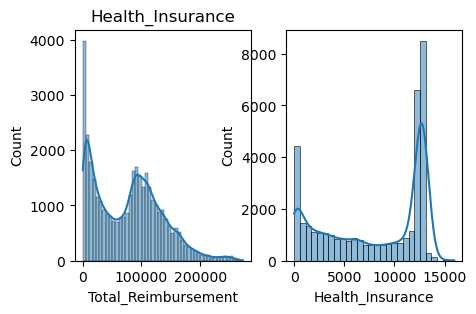

In [43]:
fig,ax = plt.subplots(1,2,figsize=(5,3))
sns.histplot(data=non_outlier,x='Total_Reimbursement',kde=True,ax=ax[0])
ax[0].set_title("Total Reimbursement")
sns.histplot(data=non_outlier,x='Health_Insurance',kde=True,ax=ax[1])
ax[0].set_title("Health_Insurance")
plt.show()

In [45]:
print("****"*30)
print(f" The health Insurance Skewnes: {non_outlier['Health_Insurance'].skew()}")
print(f" The Total_Imbursement Skewnes: {non_outlier['Total_Reimbursement'].skew()}")
print("****"*30)

************************************************************************************************************************
 The health Insurance Skewnes: -0.39594143225275497
 The Total_Imbursement Skewnes: 0.43171424718258683
************************************************************************************************************************


Since Health Insurance and Total Reimbursement have a positive and negative correlation,
to achieve a more normal distribution, I am trying to apply the log function

In [47]:
non_outlier.loc[:,'Log_Health_Insurance'] = np.log1p(non_outlier['Health_Insurance'])
non_outlier.loc[:,'Log_Total_Reimbursement']=np.log1p(non_outlier['Total_Reimbursement'])

In [49]:
print("****"*30)
print(f" Log health Insurance: {non_outlier['Log_Health_Insurance'].skew()}")
print(f" Log_Reimbursement: {non_outlier['Log_Total_Reimbursement'].skew()}")
print("****"*30)

************************************************************************************************************************
 Log health Insurance: -2.560270166888992
 Log_Reimbursement: -1.568823135619945
************************************************************************************************************************


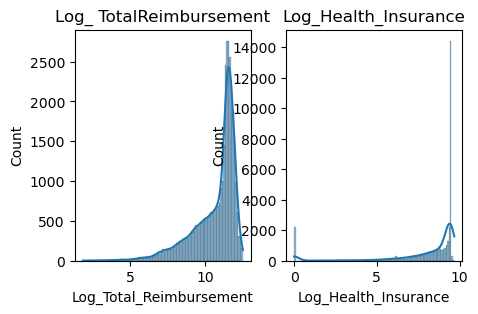

In [51]:
fig,ax = plt.subplots(1,2,figsize=(5,3))
sns.histplot(data=non_outlier,x='Log_Total_Reimbursement',kde=True,ax=ax[0])
ax[0].set_title("Log_ TotalReimbursement")
sns.histplot(data=non_outlier,x='Log_Health_Insurance',kde=True,ax=ax[1])
ax[1].set_title("Log_Health_Insurance")
plt.show()

After applying log transformation using log1p, I evaluated the skewness of the tranformaed features. The Log_Health_insurance variable
skewness of -2.56 and Total_impursement -1.56, both of them indicates the strong skewness. We can try the Box_cox

In [53]:
non_outlier['Box_Health_insurance'],lambdav=boxcox(non_outlier['Health_Insurance']+1) 
non_outlier['Box_Total_Reimbursement'],lambdat=boxcox(non_outlier['Total_Reimbursement']+1) 
## +1 => Box_cox accepi only >1. health insurance column has zero values to shift the value from zero to 1. 
## we are considering 1 at the end
print(lambdav)


0.5555658368115292


In [55]:
print(f"Box Health Insurance{non_outlier['Box_Health_insurance'].skew()}")
print(f"Box_Total_Insurance: {non_outlier['Box_Total_Reimbursement'].skew()}")

Box Health Insurance-0.7639549407212052
Box_Total_Insurance: -0.31433021988666787


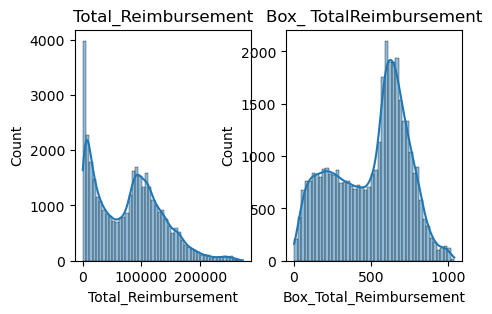

In [57]:
fig,ax = plt.subplots(1,2,figsize=(5,3))
sns.histplot(data=non_outlier,x='Total_Reimbursement',kde=True,ax=ax[0])
ax[0].set_title("Total_Reimbursement")
sns.histplot(data=non_outlier,x='Box_Total_Reimbursement',kde=True,ax=ax[1])
ax[1].set_title("Box_ TotalReimbursement")
plt.show()

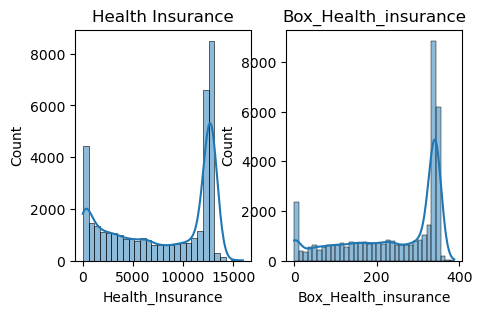

In [59]:
fig,ax = plt.subplots(1,2,figsize=(5,3))
sns.histplot(data=non_outlier,x='Health_Insurance',kde=True,ax=ax[0])
ax[0].set_title("Health Insurance")
sns.histplot(data=non_outlier,x='Box_Health_insurance',kde=True,ax=ax[1])
ax[1].set_title("Box_Health_insurance")
plt.show()

Although the original skewness of Health_Insurance and Total_Reimbursement was mild, I attempted a Box-Cox transformation to improve normality. However, the results did not significantly reduce the skewness. Upon reflection, I realized that the skewness of the independent variables (features) does not necessarily violate the assumptions of linear regression. Instead, the focus should be on checking the distribution of residuals. If the residuals are approximately normal and homoscedastic, then even skewed input features may still lead to a valid regression mode.

Scale the values since Health insurance and Total_Reimbursement(Different scale). 
You're using just one independent variable, and interpretation on original scale is important.
But if you have multiple predictors with different units (e.g., salary in thousands, insurance in hundreds), then scaling helps.


Since I am using linear regression with multiple predictors that are on different scales, I applied standard scaling to bring them to a common scale.This helps improve numerical stability and allows for easier interpretation of regression coefficients. However, for single-variable models, scaling is not strictly necessary and the original units may be more interpretable

In [61]:
non_outlier[['Health_Insurance','Total_Reimbursement']].head(2)

,Health_Insurance,Total_Reimbursement
0,12500.560000,133635.630000
1,442.030000,2403.230000


Using Univarient Analysis
Spliting the train the test data

In [63]:
X=non_outlier['Health_Insurance'] ## Features
y=non_outlier['Total_Reimbursement'] ## Target

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


print(f'X_train{X_train.shape}')
print(f'y_train{y_train.shape}')

## Test data
print(f'X_test{X_test.shape}')
print(f'y_test{y_test.shape}')

X_train(30080,)
y_train(30080,)
X_test(7521,)
y_test(7521,)


In [67]:
## After fitting the your models
X_trainconstant = sm.add_constant(X_train)
model=sm.OLS(y_train,X_trainconstant).fit()
summary1 = model.summary()

1.The R-squared values obtained from the model is 94.9 which measn that the above model explains 71.6 of variance in the total_reimpursement
and it is explained by model

2.The durbin-watson which stats shows that there is no autocorrelation between residuals

3.JB test is used to check the normality of the residuals. 
Here p value is less than 0.05. it implies the residuals are not normally distributed

4.Condition correlation or VIF test will helps us to check multicollinearity so here there is no multicollinearity. Since this is Univarint analysis multicolinearity check is not required.

5. I could see the B0 = 313.6526(intercept) and B1 = 9.6398(the slope)  Y  = B0+B1 * Health insurance ->Indicates that by increasing the
Health_insurance values increases by 9.63

Total_reimbursement  = 313.6526+9.6398* Health insurance

In [69]:
Y_hat_train = model.predict(X_trainconstant)
print(Y_hat_train.head())

44598    25355.987027
31169     5392.297430
12476    20628.328217
31602   119162.269671
3808    126294.582540
dtype: float64


In [71]:
train_Dataset = pd.DataFrame({"Y_train": y_train.values,"Y_hat_train":Y_hat_train})
train_Dataset.head()
train_Dataset['Resdiual'] = train_Dataset['Y_train']-train_Dataset['Y_hat_train']

In [73]:
train_Dataset.head(2)

,Y_train,Y_hat_train,Resdiual
44598,10707.900000,25355.987027,-14648.087027
31169,8588.300000,5392.297430,3196.002570


In [75]:
print("****"*20)
sse = sum((train_Dataset['Y_train']-train_Dataset['Y_hat_train'])**2)
print(f"Sum of Squared Error:{sse}")

mse = mean_squared_error(train_Dataset['Y_train'],train_Dataset['Y_hat_train'])
print("Average squared error per observation")
print(f"Mean Squared Error:{mse}")
print("****"*20)

print("Avreage error per observations and this will be original unit")
rmse = np.sqrt(mse)
print(f"Mean Squared Error:{rmse}")

********************************************************************************
Sum of Squared Error:27574593320600.254
Average squared error per observation
Mean Squared Error:916708554.5412319
********************************************************************************
Avreage error per observations and this will be original unit
Mean Squared Error:30277.19528855392


## Measure of Variance

In [77]:
y_train_mean = y_train.mean()
y_train_mean

76817.4357044548

In [79]:
sst_v = sum((y_train-y_train.mean())**2)
print(f"Sum of tota error: {sst_v}")
ssr_v= sum((Y_hat_train-y_train.mean())**2)
print(f"Sum of regressor: {ssr_v}")
sse_v = sum((Y_hat_train-y_train)**2)
print(f"Sum of error/residual: {sse_v}")

## Co-efficient of determination(R-squared)
## The co-efficient of determination explain the percentage of variance in the depedent variables explained independent variables explain
r2_score = ssr_v/sst_v
print(f"r2 score: {r2_score}")

##other method
r_sq=model.rsquared
print(f"{r_sq}")

## Standard error of Estimate(SEE)
unexplainederror = np.sqrt(sse_v/(len(X_train)-2))
print(f"UnExplained Error: {unexplainederror}")

## This is helps to identify the overfit or underfit issue
r2_score_adj = 1 - ((1-r2_score)*(len(X_train)-1)/(len(X_train)-2))
print(f"Adjuested r2score {r2_score_adj}")

Sum of tota error: 97260423416904.3
Sum of regressor: 69685830096293.484
Sum of error/residual: 27574593320600.254
r2 score: 0.7164870113467116
0.7164870113468207
UnExplained Error: 30278.201894445072
Adjuested r2score 0.7164775854211629


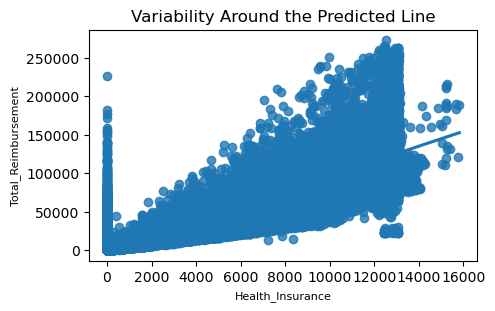

In [81]:
plt.figure(figsize=(5,3))
sns.regplot(x=X_train,y=y_train)
plt.title("Variability Around the Predicted Line",fontsize=12)
plt.xlabel('Health_Insurance', fontsize = 8)
plt.ylabel('Total_Reimbursement', fontsize = 8)
# display the plot
plt.show()



In [83]:
## Inference about the slope and intercept
summary2=model.summary()
## y =  B0(313.6526)+B1(9.6398)*Health_Insurance

## t-test for slope and incerpt
If the slope (β₁) is not significantly different from zero, it suggests that the independent variable does not have a meaningful impact on the dependent variable.

If the intercept (β₀) is not significant, it implies the expected value of the dependent variable may not be significantly different from zero when the independent variable is zero.

null hypothesie:H0=0, Alternative hypothesis: H1 <> 0
if the P values is less than 0.05 means --we reject the null hypothesis.

t_test = co-efficient / Standard co-efficient(error)

In [85]:
b1 = model.params.iloc[1]
print("Co-efficient of B1:",b1)
b0 = model.params.iloc[0]
print("Co-efficient of B0:",b0)
print("***"*15)
SE_b1 = model.bse.iloc[1]
print("Standard error of B1:",SE_b1)
SE_b0 = model.bse.iloc[0]
print("Standard error B0:",SE_b0)
print("***"*15)
## T-test
t_test_B0= b0/SE_b0
print("T-test-B0",t_test_B0)
t_test_B1= b1/SE_b1
print("T-test-B1",t_test_B1)
print("***"*15)

Co-efficient of B1: 9.6398238481116
Co-efficient of B0: 313.65263391446746
*********************************************
Standard error of B1: 0.034964469206037976
Standard error B0: 327.8354392527518
*********************************************
T-test-B0 0.9567380348792925
T-test-B1 275.7034231323869
*********************************************


In [82]:
n=len(X_train)
k=2
df = n-k
p_value_B0 = 2 * (1- stats.t.cdf(abs(t_test_B0),df))
p_value_B1 = 2 * (1- stats.t.cdf(abs(t_test_B1),df))

print(f"B0 p-value is :{p_value_B0} and B1 p-values is :{p_value_B1}")

B0 p-value is :0.3387071849118697 and B1 p-values is :0.0


In [89]:
df_copy = df

The p-value for the intercept (B₀) is 0.3387, which is greater than the standard significance level (typically α = 0.05). This suggests that the intercept term is not statistically significant, meaning we do not have strong evidence that the intercept differs from Zero.

On the other hand, the p-value for the slope coefficient (B₁) is 0.0000, which is far below the 0.05 threshold.This means the slope is statistically significant,indicating that the predictor variable (e.g: Health_Insurance) has a significant effect on the target variable (Total_Reimbursement).

# Confidence interval for Slope and Intercept

In [91]:
interval = stats.t.interval(0.95,df=non_outlier.shape[0]-1,loc=model.params.iloc[0],scale=model.bse.iloc[0])
print("95% Confidence Interval:",interval)

95% Confidence Interval: (-328.91370442974284, 956.2189722586777)


In [93]:
interval_co_efficient = stats.t.interval(0.95,df=non_outlier.shape[1]-1,loc = model.params.iloc[1],scale = model.bse.iloc[1])
print("95% Confidence Interval:",interval_co_efficient)

95% Confidence Interval: (9.564832520008409, 9.714815176214792)


# ANOVA test for Whole Model
  H0: Beta1 is equal 0,H1: Beta1 is not equal to zero

**This method works with the formula interface, where we pass the DataFrame to get a summary of the whole model.** 
**Another advantage of this method is that, it allows us to include categorical variables as well**


In [95]:
model_ols = ols('Total_Reimbursement~Health_Insurance',data=pd.concat([y_train,X_trainconstant],axis=1)).fit()
summary=model_ols.summary()


In [932]:
slr_model = anova_lm(model_ols)
slr_model

,df,sum_sq,mean_sq,F,PR(>F)
Health_Insurance,1.000000,69685830096299.078125,69685830096299.078125,76012.377527,0.000000
Residual,30078.000000,27574593320600.203125,916769509.960775,NaN,NaN


In [99]:
df.dtypes

Year                    object
Type_of_yr              object
Income                 float64
Other_Income           float64
Overtime               float64
Total_Income           float64
Health_Insurance       float64
Retirement             float64
Other_Benefits         float64
Total_Benefits         float64
Total_Reimbursement    float64
dtype: object

## Assumption of Linear Regression
1. The dependent/independent variable should be numeric in nature
2. Multicollinearlity

## **Multiple Linear Regression (MLR)**

In [101]:
df_feature = non_outlier[['Income','Other_Income','Overtime','Total_Income','Health_Insurance','Retirement','Other_Benefits','Total_Benefits']]
df_Target = non_outlier['Total_Reimbursement']

In [103]:
print(f"The Health Insurance:\n{df_feature.dtypes}")
print(f"The Total Reimbursement: {df_Target.dtype}")

The Health Insurance:
Income              float64
Other_Income        float64
Overtime            float64
Total_Income        float64
Health_Insurance    float64
Retirement          float64
Other_Benefits      float64
Total_Benefits      float64
dtype: object
The Total Reimbursement: float64


**Multicollinearity** :The Presence of strong correlation between independent variable is called multicollinearity.


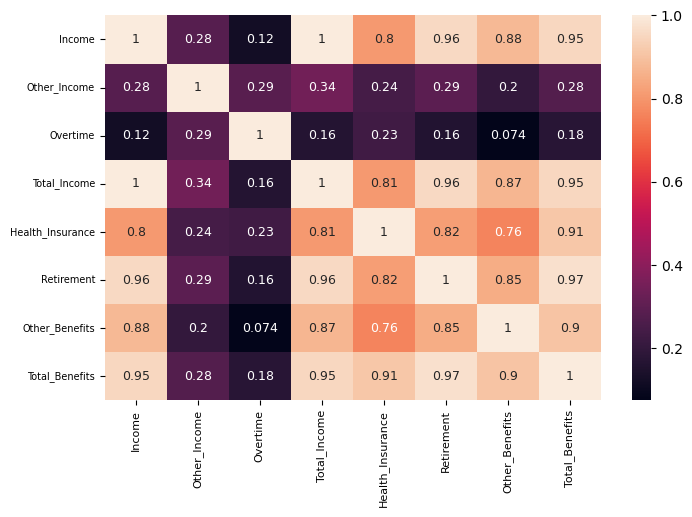

In [105]:
plt.figure(figsize = (8,5))
sns.heatmap(df_feature.corr(),annot=True,annot_kws={'size':9})
plt.xticks(fontsize=8)
plt.yticks(rotation = 'horizontal',fontsize=7)
plt.show()

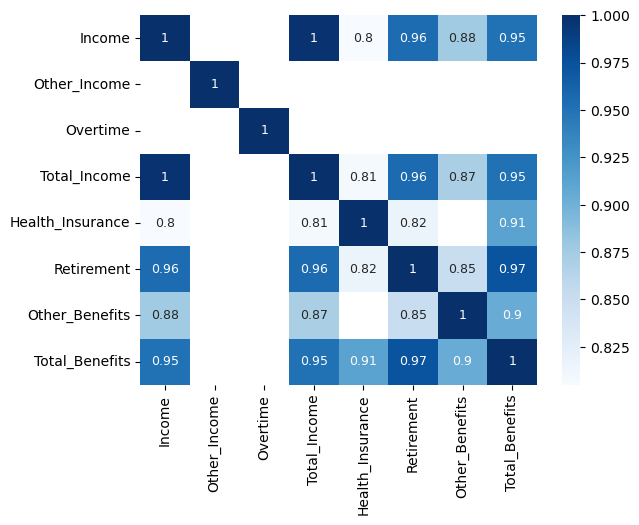

In [107]:
sns.heatmap(df_feature.corr()[np.abs(df_feature.corr()>0.8)],annot=True,annot_kws={'size':9},cmap='Blues')
plt.show()

**Interpretation:** The above heatmap, show the variables having a strong positive/negative correlation. The variables with dark shade represent the strong positive correlation.


**Multicolinearity** : Variance Inflation Factor (VIF)

In [109]:
df_feature.head(2)

,Income,Other_Income,Overtime,Total_Income,Health_Insurance,Retirement,Other_Benefits,Total_Benefits
0,92288.220000,267.450000,270.450000,92826.120000,12500.560000,20703.200000,7605.750000,40809.510000
1,1466.380000,0.000000,350.230000,1816.610000,442.030000,3.000000,141.590000,586.620000


In [111]:
X = add_constant(df_feature)

In [113]:
VIF_data = pd.DataFrame()
VIF_data['Feature'] = X.columns
VIF_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
VIF_data['VIF']

0          3.844962
1               inf
2               inf
3               inf
4               inf
5     205705.263412
6   65314450.722921
7     137133.542927
8   13208062.727506
Name: VIF, dtype: float64

**r2**:value of 1.0 for a variable implies perfect multicollinearity—one or more variables in your dataframe can be perfectly predicted from the others. This is a severe issue and usually points to:
Duplicate columns (identical variables)
Linear dependence (one column is a scalar multiple or linear combination of others)
Insufficient or erroneous data



In [115]:
VIF_data

,Feature,VIF
0,const,3.844962
1,Income,inf
2,Other_Income,inf
3,Overtime,inf
4,Total_Income,inf
5,Health_Insurance,205705.263412
6,Retirement,65314450.722921
7,Other_Benefits,137133.542927
8,Total_Benefits,13208062.727506


In [117]:
df_feature.corr()

,Income,Other_Income,Overtime,Total_Income,Health_Insurance,Retirement,Other_Benefits,Total_Benefits
Income,1.000000,0.283114,0.117961,0.997466,0.804984,0.955034,0.877242,0.950583
Other_Income,0.283114,1.000000,0.286888,0.343687,0.243310,0.293439,0.197801,0.276834
Overtime,0.117961,0.286888,1.000000,0.164472,0.232102,0.159402,0.074363,0.175322
Total_Income,0.997466,0.343687,0.164472,1.000000,0.808311,0.955469,0.871155,0.950682
Health_Insurance,0.804984,0.243310,0.232102,0.808311,1.000000,0.815871,0.763460,0.912892
Retirement,0.955034,0.293439,0.159402,0.955469,0.815871,1.000000,0.851029,0.973704
Other_Benefits,0.877242,0.197801,0.074363,0.871155,0.763460,0.851029,1.000000,0.904075
Total_Benefits,0.950583,0.276834,0.175322,0.950682,0.912892,0.973704,0.904075,1.000000


# I could see that from the below some of the columns highly correlated with Target variable which cause the R2 is close to 1 and I have removed those values (Total_income)

In [897]:
df_feature1 = non_outlier[['Income','Other_Income','Overtime','Health_Insurance','Other_Benefits','Total_Benefits','Retirement']]

In [121]:
VIF_data = pd.DataFrame()
X_1 = add_constant(df_feature1)
VIF_data['Feature'] = X_1.columns
VIF_data['VIF']=[variance_inflation_factor(X_1.values,i) for i in range(X_1.shape[1])]
VIF_data

,Feature,VIF
0,const,3.844974
1,Income,13.994360
2,Other_Income,1.185284
3,Overtime,1.172849
4,Health_Insurance,9.016871
5,Other_Benefits,6.504290
6,Total_Benefits,40.936939


Interpreting VIF Values
**VIF** = 1: No multicollinearity.

**1 < VIF < 5**: Moderate multicollinearity.

**VIF ≥ 5**: High multicollinearity — may need further investigation.

**VIF ≥ 10**: Very high multicollinearity — corrective action usually recommended

**identify features with VIF typically income and Total_benefit**.
Drop one of the correlated features, the one which is less important or with a higher VIF. Removing such features reduces redundancy and improves model interpretability and stability.

In [104]:
def calculate_vif(df,threshhold = 7.0):
    
    vif_f = pd.DataFrame()
    drop_columns = []
    X = add_constant(df)
   
    vif_f['feature'] = X.columns
    vif_f['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    

    multicolumns = vif_f[vif_f['vif']<threshhold]
    

    
    return multicolumns

viff = calculate_vif(df_feature1)
viff

,feature,vif
0,const,3.844974
2,Other_Income,1.185284
3,Overtime,1.172849
5,Other_Benefits,6.504290


Non_multicollinearity=viff[viff['vif'] < 10]
Non_multicollinearity

In [175]:
df_category = non_outlier.select_dtypes(include =object)
#df_category
encoded = pd.get_dummies(data=df_category,drop_first=True)
encoded = encoded.astype(int)
encoded.head(1)

,Year_2016,Year_2017,Year_2018,Type_of_yr_Financial
0,0,0,0,1


In [853]:
feature_2=non_outlier[['Other_Income','Overtime','Other_Benefits','Retirement']]
con_feature = pd.concat([feature_2,encoded],axis=1)
con_feature.corr()

,Other_Income,Overtime,Other_Benefits,Retirement,Year_2016,Year_2017,Year_2018,Type_of_yr_Financial
Other_Income,1.000000,0.286888,0.197801,0.293439,-0.016698,0.009130,0.005463,-0.015304
Overtime,0.286888,1.000000,0.074363,0.159402,0.012109,-0.009221,-0.009594,-0.001412
Other_Benefits,0.197801,0.074363,1.000000,0.851029,0.013649,0.024125,-0.011498,0.000275
Retirement,0.293439,0.159402,0.851029,1.000000,-0.039824,-0.023913,0.035083,-0.024587
Year_2016,-0.016698,0.012109,0.013649,-0.039824,1.000000,-0.259305,-0.264966,0.360991
Year_2017,0.009130,-0.009221,0.024125,-0.023913,-0.259305,1.000000,-0.387733,-0.094730
Year_2018,0.005463,-0.009594,-0.011498,0.035083,-0.264966,-0.387733,1.000000,-0.099732
Type_of_yr_Financial,-0.015304,-0.001412,0.000275,-0.024587,0.360991,-0.094730,-0.099732,1.000000


In [855]:
vif_data_con = pd.DataFrame()
X_11 = add_constant(con_feature)
vif_data_con['Feature'] = X_11.columns
vif_data_con['VIF']=[variance_inflation_factor(X_11.values,i) for i in range(X_11.shape[1])]
vif_data_con

,Feature,VIF
0,const,6.512535
1,Other_Income,1.177662
2,Overtime,1.108434
3,Other_Benefits,3.782047
4,Retirement,4.009774
5,Year_2016,1.453386
6,Year_2017,1.426456
7,Year_2018,1.416003
8,Type_of_yr_Financial,1.150154


In [861]:
Mul_X = con_feature
Mul_Y = non_outlier['Total_Reimbursement']

In [863]:
Mul_X_train,Mul_X_test,Mul_Y_train,Mul_Y_test = train_test_split(Mul_X,Mul_Y,test_size=0.3,random_state=42)

##Step 2: Initialize the scaler
scaler = StandardScaler()

Mul_X_train_Scaled = scaler.fit_transform(Mul_X_train)
Mul_X_test_Scaled = scaler.fit(Mul_X_test)

## Train
print("X_Train: ",Mul_X_train.shape)
print("Y_Train: ",Mul_Y_train.shape)

## Test
print("X_Test: ",Mul_X_test.shape)
print("Y-Test: ",Mul_Y_test.shape)

X_Train:  (26320, 8)
Y_Train:  (26320,)
X_Test:  (11281, 8)
Y-Test:  (11281,)


In [865]:
X_trainconstant = sm.add_constant(Mul_X_train_Scaled)
MLR_linear = sm.OLS(Mul_Y_train,X_trainconstant).fit()
mlr_summary = MLR_linear.summary()
print(mlr_summary)
mlr_y_hat_train = MLR_linear.predict(X_trainconstant)
##mlr_y_hat_train

                             OLS Regression Results                            
Dep. Variable:     Total_Reimbursement   R-squared:                       0.961
Model:                             OLS   Adj. R-squared:                  0.961
Method:                  Least Squares   F-statistic:                 8.178e+04
Date:                 Sat, 26 Jul 2025   Prob (F-statistic):               0.00
Time:                         17:22:02   Log-Likelihood:            -2.8269e+05
No. Observations:                26320   AIC:                         5.654e+05
Df Residuals:                    26311   BIC:                         5.655e+05
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.683e+04     68.899   1115.07

In [271]:
MLR_linear.pvalues

const   0.000000
x1      0.000000
x2      0.000000
x3      0.000000
x4      0.008570
x5      0.326841
x6      0.140305
x7      0.118976
dtype: float64

In [283]:
con_feature.head(2)

,Other_Income,Overtime,Other_Benefits,Year_2016,Year_2017,Year_2018,Type_of_yr_Financial
0,267.450000,270.450000,7605.750000,0,0,0,1
1,0.000000,350.230000,141.590000,0,0,0,0


In [867]:
mlr_data=pd.DataFrame({'Mul_Y_train':Mul_Y_train.values,'mlr_y_hat_train':mlr_y_hat_train})

In [869]:
mlr_data['MLR_residuals'] = mlr_data['Mul_Y_train']-mlr_data['mlr_y_hat_train']
sum_of_squarederror = sum((mlr_data['Mul_Y_train']-mlr_data['mlr_y_hat_train'])**2)
Mean_squarederror = sum_of_squarederror/len(Mul_X_train)
root_mean_square = np.sqrt(Mean_squarederror)
root_mean_square

11175.8156479792

In [ ]:
### We could see that Year 2017,2018,Type of yr financial is insignificant hence excluding those columns

In [871]:
significant_feature = con_feature.drop(['Year_2017','Year_2018','Type_of_yr_Financial'],axis=1)
significant_feature.head(1)

,Other_Income,Overtime,Other_Benefits,Retirement,Year_2016
0,267.450000,270.450000,7605.750000,20703.200000,0


In [873]:
Mul_X_train_sign,Mul_X_test_sign,Mul_Y_train_sign,Mul_Y_test_sign = train_test_split(significant_feature,Mul_Y,test_size=0.3,random_state=42)

##Step 2: Initialize the scaler
scaler = StandardScaler()

Mul_X_train_Scaled_sign = scaler.fit_transform(Mul_X_train_sign)
Mul_X_test_Scaled_sign = scaler.transform(Mul_X_test_sign)

## Train
print("X_Train: ",Mul_X_train_Scaled_sign.shape)
print("Y_Train: ",Mul_Y_train_sign.shape)

## Test
print("X_Test: ",Mul_X_train_Scaled_sign.shape)
print("Y-Test: ",Mul_Y_test_sign.shape)


X_train_scaledsigni = add_constant(Mul_X_train_sign)
model_signi =  sm.OLS(Mul_Y_train_sign,X_train_scaledsigni).fit()
out=model_signi.summary()
print(out)
Mul_Y_Hat_train = model_signi.predict(X_train_scaledsigni)

X_Train:  (26320, 5)
Y_Train:  (26320,)
X_Test:  (26320, 5)
Y-Test:  (11281,)
                             OLS Regression Results                            
Dep. Variable:     Total_Reimbursement   R-squared:                       0.960
Model:                             OLS   Adj. R-squared:                  0.960
Method:                  Least Squares   F-statistic:                 1.252e+05
Date:                 Sat, 26 Jul 2025   Prob (F-statistic):               0.00
Time:                         17:22:36   Log-Likelihood:            -2.8325e+05
No. Observations:                26320   AIC:                         5.665e+05
Df Residuals:                    26314   BIC:                         5.666e+05
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [851]:
df_intertable = con_feature[['Other_Income','Overtime','Other_Benefits']]

In [662]:
df_intertable['interaction'] = df_intertable['Other_Income']*df_intertable['Other_Benefits']

In [664]:
interaction=df_intertable[['interaction','Overtime']]
interaction.head(2)

,interaction,Overtime
0,2034157.837500,270.450000
1,0.000000,350.230000


In [877]:
Mul_X_train_interaction,Mul_X_test_interaction,Mul_Y_train_sign_interaction,Mul_Y_test_sign_interaction = train_test_split(interaction,Mul_Y,test_size=0.3,random_state=42)

##Step 2: Initialize the scaler
scaler = StandardScaler()

Mul_X_train_Scaled_sign_interaction = scaler.fit_transform(Mul_X_train_interaction)
Mul_X_test_Scaled_sign_interaction = scaler.transform(Mul_X_test_interaction)

## Train
print("X_Train: ",Mul_X_train_Scaled_sign_interaction.shape)
print("Y_Train: ",Mul_Y_train_sign_interaction.shape)

## Test
print("X_Test: ",Mul_X_test_Scaled_sign_interaction.shape)
print("Y-Test: ",Mul_Y_test_sign_interaction.shape)

X_Train:  (26320, 2)
Y_Train:  (26320,)
X_Test:  (11281, 2)
Y-Test:  (11281,)


In [668]:
X_train_interaction_constant = add_constant(Mul_X_train_Scaled_sign_interaction)
interaction_model = sm.OLS(Mul_Y_train_sign_interaction,X_train_interaction_constant).fit()
interaction_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Total_Reimbursement   R-squared:                       0.171
Model:                             OLS   Adj. R-squared:                  0.171
Method:                  Least Squares   F-statistic:                     2720.
Date:                 Sat, 26 Jul 2025   Prob (F-statistic):               0.00
Time:                         12:34:46   Log-Likelihood:            -3.2302e+05
No. Observations:                26320   AIC:                         6.461e+05
Df Residuals:                    26317   BIC:                         6.461e+05
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.683e+04    318.940    240.882      0.000    7.62e+04    7.75e+04
x1          2.187e+04    325.185     67.244      0.000    2.12e+04    2.25e+04
x2          5403.8793    325.185     16.618      0.000    4766.498    6041.260
==============================================================================
Omnibus:                     1699.941   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2047.652
Skew:                           0.681   Prob(JB):                         0.00
Kurtosis:                       2.898   Cond. No.                         1.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Based on the above output, interaction variable is not helping much and I have observed that r2 values decreased. I am consider the above query only.

In [769]:
targetvar = np.log1p(non_outlier['Total_Reimbursement'])
targetvar.head()

0   11.802880
1    7.784985
3   11.023700
4   10.978893
5   11.604208
Name: Total_Reimbursement, dtype: float64

In [982]:
Mul_X_train_Scaled_sign

array([[-0.58854396, -0.42971773,  1.35871362,  1.02410312,  2.35319064],
       [ 1.85629099,  2.91995267,  0.48073147,  0.107369  ,  2.35319064],
       [ 1.13620212,  2.19109446,  0.68621356,  0.63172709, -0.42495494],
       ...,
       [-0.39380812,  1.40841986, -0.64037665, -0.47117942, -0.42495494],
       [-0.58854396, -0.42676444,  0.98315388,  0.58774789, -0.42495494],
       [-0.58854396, -0.43045606,  0.24290842,  0.23772785, -0.42495494]])

In [1046]:
Mul_X_train_sign,Mul_X_test_sign,Mul_Y_train_sign,Mul_Y_test_sign = train_test_split(significant_feature,Mul_Y,test_size=0.3,random_state=42)

##Step 2: Initialize the scaler
scaler = StandardScaler()

Mul_X_train_Scaled_sign = scaler.fit_transform(Mul_X_train_sign)
Mul_X_test_Scaled_sign = scaler.transform(Mul_X_test_sign)

## Train
print("X_Train:",Mul_X_train_Scaled_sign.shape)
print("Y_Train:",Mul_Y_train_sign.shape)

## Test
print("X_Test:",Mul_X_train_Scaled_sign.shape)
print("Y-Test:",Mul_Y_test_sign.shape)

## Commended query doesn't support for Kfold and Crossvalidation so I am using linear regression


# X_train_scaledsigni = add_constant(Mul_X_train_Scaled_sign)
# model_signi =  sm.OLS(Mul_Y_train_sign,X_train_scaledsigni).fit()
# out=model_signi.summary()
# print(out)

model_signi = LinearRegression()
model_signi.fit(Mul_X_train_Scaled_sign,Mul_Y_train_sign)
r2_score = model_signi.score(Mul_X_train_Scaled_sign,Mul_Y_train_sign)
print("r2Score:",r2_score)

Mul_Y_Hat_train = model_signi.predict(Mul_X_train_Scaled_sign)

X_Train: (26320, 5)
Y_Train: (26320,)
X_Test: (26320, 5)
Y-Test: (11281,)
r2Score: 0.9596496134001022


model_signi.resid

In [988]:
Final_Data = pd.DataFrame({"Y_Train":Mul_Y_train_sign,"Y_Predicted": Mul_Y_Hat_train})
Final_Data.head(2)
Final_Data['Residuals'] = Final_Data['Y_Train']-Final_Data['Y_Predicted']

In [990]:
Meansquareerror = mean_squared_error(Final_Data['Y_Train'],Final_Data['Y_Predicted'])
print("Mean squared Error: ",Meansquareerror)
Rootmeansqaureerror = np.sqrt(Meansquareerror)
print("Mean squared Error: ",Rootmeansqaureerror)

Mean squared Error:  130351368.76150061
Mean squared Error:  11417.152392847378


## checking the assumption after model built


**Linear Relationship between Independent and Dependent Variable**

In [992]:
Data = pd.concat([Mul_X_train_sign,Final_Data],axis=1)
Data.head()

,Other_Income,Overtime,Other_Benefits,Retirement,Year_2016,Y_Train,Y_Predicted,Residuals
19403,0.000000,3.000000,8264.390000,19365.760000,1,144746.680000,140218.442115,4528.237885
34197,5817.310000,4539.860000,5547.450000,11323.450000,1,97687.210000,100442.799497,-2755.589497
47984,4103.910000,3552.680000,6183.320000,15923.530000,0,109497.330000,118067.679314,-8570.349314
3573,0.000000,2.000000,2018.830000,5568.410000,0,36220.170000,41502.031202,-5281.861202
11575,0.000000,3.000000,3638.760000,9271.210000,0,66251.700000,66573.227690,-321.527690


In [996]:
Data[['Other_Income','Y_Train']].head(10)

,Other_Income,Y_Train
19403,0.000000,144746.680000
34197,5817.310000,97687.210000
47984,4103.910000,109497.330000
3573,0.000000,36220.170000
11575,0.000000,66251.700000
25203,350.000000,95984.780000
2904,0.000000,8431.070000
36463,13.840000,10239.540000
41473,1111.730000,24885.560000
49436,628.700000,15351.820000


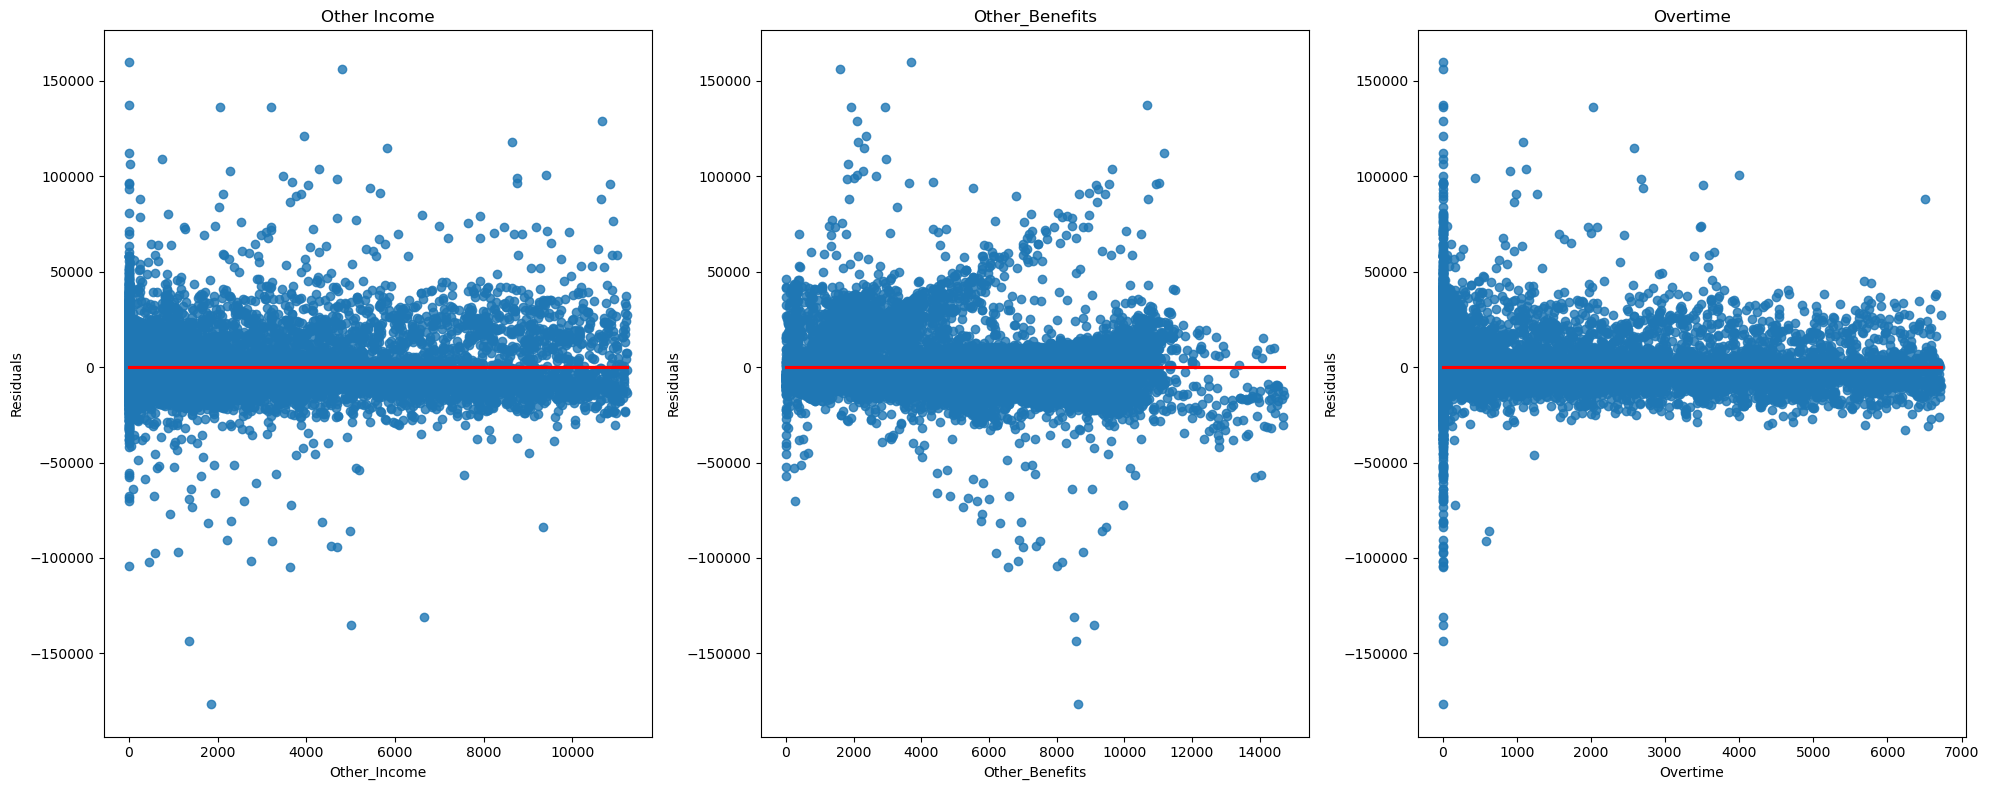

In [998]:
fig,ax = plt.subplots(1,3,figsize=(20,8))
sns.regplot(data=Data,x='Other_Income',y='Residuals',ax=ax[0],line_kws={'color':'red'})
ax[0].set_title("Other Income")
sns.regplot(data=Data,x='Other_Benefits',y='Residuals',ax=ax[1],line_kws={'color':'red'})
ax[1].set_title("Other_Benefits")
sns.regplot(data=Data,x='Overtime',y='Residuals',ax=ax[2],line_kws={'color':'red'})
ax[2].set_title("Overtime")
plt.tight_layout()
plt.show()

## **No Autocorrelation :** The below value is close to 2, we can consider that there is no autocorrelation between observation

In [1000]:
Durbin_test = durbin_watson(Data['Residuals'])
Durbin_test

1.9749971856963389

## **Homoscedasticity:** The constant variance accross all the levels of the independent variables

**H0(Null Hypothesis)**: The variance are constant
**H1(Null Hypothesis)**: The variance not constant

**Interpretation**: The P-values is less than 0.05; we can conclude that there is Heterskedasticity present in the data

In [1002]:
Homo_output = sms.het_breuschpagan(Data['Residuals'],model_signi.model.exog) ##Passing the predictors
Homo_output ## Second values is P - values

## Since I have changed the OLS method to Linearregression model_signi.model.exog thorwing error as we don't have attributes in LG

AttributeError: 'LinearRegression' object has no attribute 'model'

## **Test for Normality** 
**1. QQ plot**
**2. Shapiro**

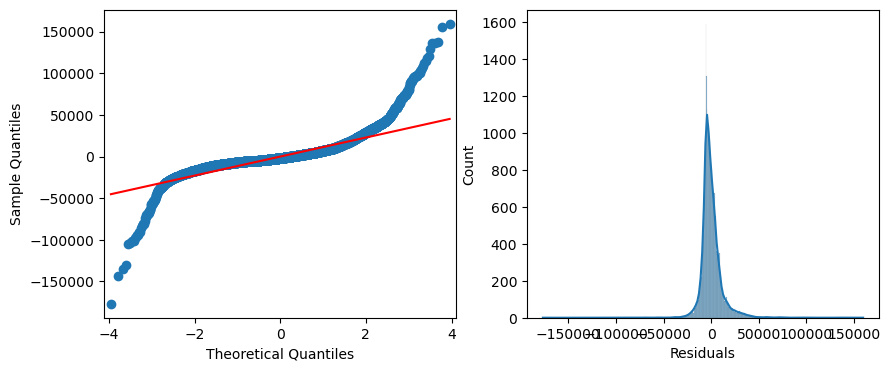

In [1004]:
fig,ax=plt.subplots(1,2,figsize=(10,4))

sm.qqplot(Data['Residuals'],line='s',ax=ax[0])
sns.histplot(x=Data['Residuals'],kde=True,ax=ax[1])
plt.show()

**2. Shapiro**

**H0:** Residuals are normally Distributed.

**H1:** Residuals are not normally Distributed.

**P_values is less than 0.05. we can say that the residuals are not normally distributed**

In [1006]:
stats,p_value = shapiro(Data['Residuals'])
print("Statistic:",stats)
print("p_value:",p_value)

Statistic: 0.7908918897717939
p_value: 1.5058339495664504e-100


## Model Evaluation

**Model has explained the variance 95.6% from the Total variance.**
1. R2value
2. R2Adj
3. F_test
F_value = (R_squared/(k-1)/((1-R_squared)/(n-k))
K = Number of beta co-efficient
n-Observation


The below calculation will be help full for OLS method

In [ ]:
print("****"*20)
R2_train = model_signi.rsquared
print(f"R2_train:",R2_train)

R2_Adj_train = model_signi.rsquared_adj
print(f"R2_train:",R2_Adj_train)
print("****"*20)
F_value = (R2_train/(len(Mul_X_train_sign.columns)-1))/((1-R2_train)/(len(Mul_X_train_sign)))
print("Critical Values: ",F_value)

In [1080]:
SST =  sum((np.mean(Data['Y_Train']) - Data['Y_Train'])**2)
print("SST:",SST)

SSE = sum((Data['Y_Train'] - Data['Y_Predicted'])**2)
print("SSE:",SSE)

SSR = sum((np.mean(Data['Y_Train']) - Data['Y_Predicted'])**2)
print("SSR:",SSR)


R2_score = (SSR/SST)
print("R2_score:",round(R2_score,5))

Adj_R2score = 1 - (((1-R2_score)*(len(Mul_X_train_sign)-1))/(len(Mul_X_train_sign)-len(Mul_X_train_sign.columns)-1))
print("Adj_R2score:",round(Adj_R2score,4))

kf = KFold(n_splits=5,shuffle=True,random_state=42)

## Using Cross_val_score to get the score automatically (example : r2)
score = cross_val_score (model_signi,X_train_scaledsigni,Mul_Y_train_sign,cv=kf,scoring='r2')
print("r2 for each fold:",score)
print("Average R2:",np.mean(score))

SST: 85026397883667.05
SSE: 3430848025802.696
SSR: 81595549857864.89
R2_score: 0.95965
Adj_R2score: 0.9596
r2 for each fold: [0.95883482 0.9577535  0.96052963 0.95856957 0.9624269 ]
Average R2: 0.9596228833999337


## Model Performance
**Let do some predictios using train and test datset**

In [1090]:
## Train data Prediction
train_pred = model_signi.predict(Mul_X_train_Scaled_sign)


##Test Data Prediction
test_pred = model_signi.predict(Mul_X_test_Scaled_sign)


In [1125]:
Train1_data = pd.DataFrame({"Train_Pred":train_pred,"Train_Data":Mul_Y_train_sign})
Train1_data['Residual']= Train_data['Train_Data']-Train_data['Train_Pred']
Train1_data.head(2)

,Train_Pred,Train_Data,Residual
19403,140218.442115,144746.680000,4528.237885
34197,100442.799497,97687.210000,-2755.589497


In [1121]:
test_data = pd.DataFrame({"Test_Data":test_pred,"Test_Data":Mul_Y_test_sign})
test_data['Residual'] = test_data['Test_Data']-test_data['Test_pred']
test_data.head(2)

,Test_pred,Test_Data,Residual
33579,10280.144094,159.120000,-10121.024094
46759,93704.872757,101856.110000,8151.237243


**7.1 Mean Squared Error(MSE)**

In [1139]:
mse_train = round(mean_squared_error(Train1_data['Train_Data'],Train1_data['Train_Pred']),4)
print("Train MSE:",mse_train)
mse_test = round(mean_squared_error(test_data['Test_Data'],test_data['Test_pred']),4)
print("Test MSE:",mse_test)

Train MSE: 130351368.7615
Test MSE: 124348060.9216


**7.2 Root Mean Squared Error(MSE)**

In [1142]:
Rmse_train = round(np.sqrt(mse_train),4)
print("Train RMSE:",Rmse_train)
Rmse_test = round(np.sqrt(mse_test),4)
print("Test RMSE:",Rmse_test)

Train RMSE: 11417.1524
Test RMSE: 11151.1462


**7.3 Mean Absolute Error(MAE)**

In [1145]:
MAE_train = round(mean_absolute_error(Train1_data['Train_Data'],Train1_data['Train_Pred']),4)
print("Train MAE:",MAE_train)
MAE_test = round(mean_absolute_error(test_data['Test_Data'],test_data['Test_pred']),4)
print("Test MAE:",MAE_train)

Train MAE: 7118.2487
Test MAE: 7118.2487


**7.4 Mean Absolute Percentage Error (MAPE)**

**Compare Model Performance**

In [1169]:
final_overview = pd.DataFrame({"ModelName":["Linear Regression"],"R2_score":[R2_score],"Adj_R2_score":[Adj_R2score],
                               "Train MSE":[mse_train],"Test MSE":[mse_test],"Train RMSE":[Rmse_train],"Test RMSE":[Rmse_test]})


In [1171]:
final_overview

,ModelName,R2_score,Adj_R2_score,Train MSE,Test MSE,Train RMSE,Test RMSE
0,Linear Regression,0.959650,0.959642,130351368.761500,124348060.921600,11417.152400,11151.146200


In [1183]:
model_Ridgo = Ridge(alpha=4)
model_Ridgo.fit(Mul_X_train_Scaled_sign,Mul_Y_train_sign)
r2_score = model_Ridgo.score(Mul_X_train_Scaled_sign,Mul_Y_train_sign)
print("r2Score:",r2_score)

Ridgo_Mul_Y_Hat_train = model_signi.predict(Mul_X_train_Scaled_sign)

r2Score: 0.9596495853939984
